In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as sm

import os; import sys
sys.path.append('/home/mitch/school/mfl/src/')
import utils
import sys; sys.path.append('/home/mitch/util/python')

In [239]:
raw     = '/home/mitch/Dropbox/data/mexico_fls/raw/2005/'
processed = '/home/mitch/Dropbox/data/mexico_fls/processed2/'

figs    = '/home/mitch/school/mfl/fig/'
dicts   = '/home/mitch/school/mfl/notebooks/dicts/'

In [240]:
df = pd.read_csv(processed + 'data.csv')
df

,hhid,hhmember,weight_ind,is_hhm,age,state,attended_school,education,gender,income_type,...,hh_has_savings_credit_institution,hh_has_savings_batch,hh_has_savings_person_not_hhm,hh_has_savings_afores,hh_has_savings_solidarity,hh_has_savings_at_house,hh_has_savings_other,hh_has_debts_12mth,hh_debts_12mth,hh_has_savings
0,1000,1,2244,1.0,41.0,20.0,1.0,medium,Male,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,3000,1,2244,1.0,45.0,20.0,0.0,low,Male,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,8000,1,2244,1.0,33.0,20.0,1.0,high,Male,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15000.0,True
3,10000,1,2074,1.0,39.0,20.0,1.0,low,Female,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5000.0,False
4,11000,1,2074,1.0,29.0,20.0,1.0,medium,Male,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5084,10751000,1,5539,1.0,39.0,19.0,1.0,low,Male,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12000.0,False
5085,10752000,1,1614,1.0,32.0,19.0,1.0,medium,Male,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7000.0,False
5086,10754000,1,817,1.0,43.0,19.0,1.0,low,Male,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1500.0,False
5087,10758000,1,839,1.0,27.0,19.0,1.0,low,Male,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


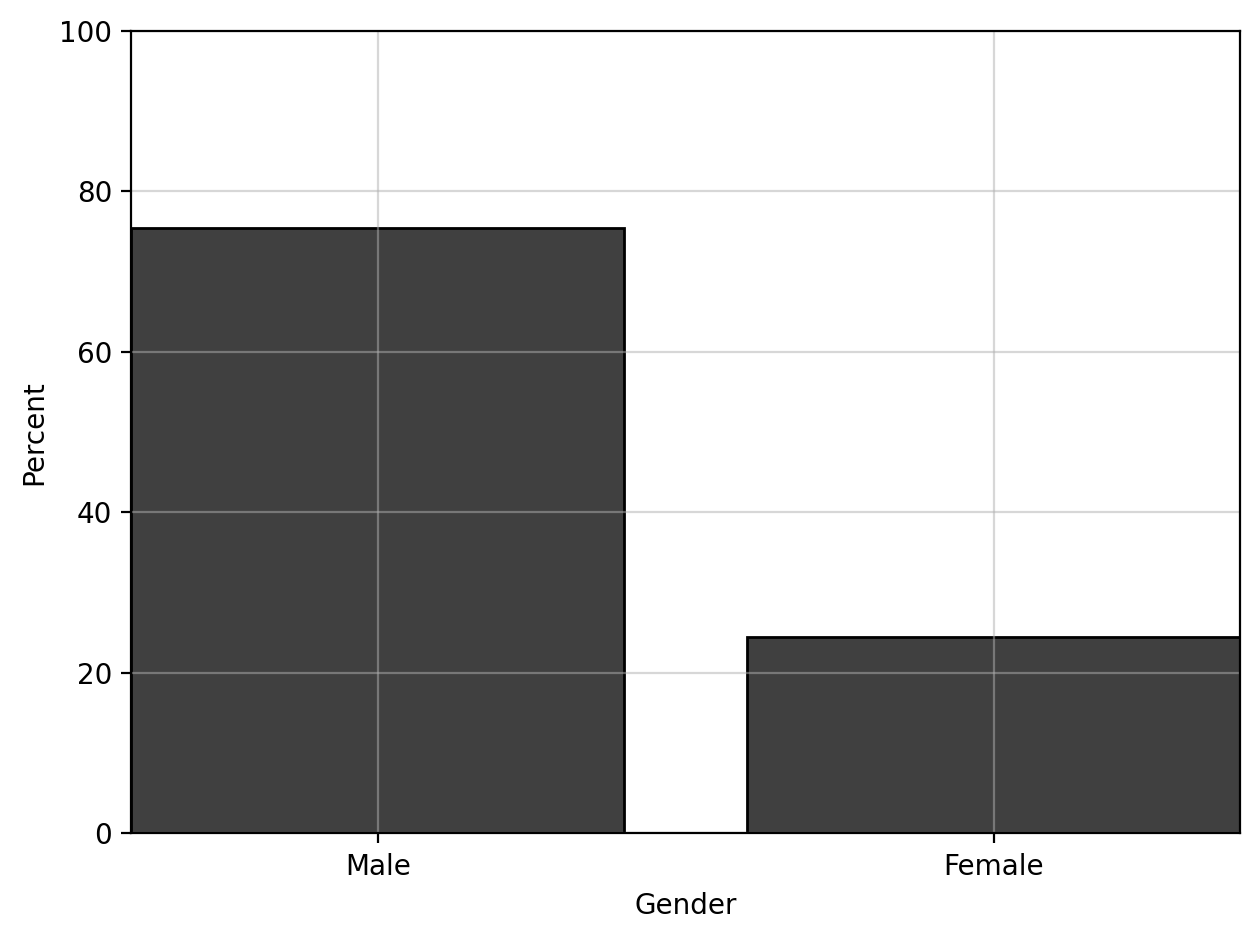

In [241]:
plt.clf()
ax = sns.histplot(df, x='gender', 
             stat='percent', 
             weights='weight_hh',
             shrink=0.8)
ax.set_xlabel('Gender')
ax.set_ylim(0, 100)
plt.show()

<ipython-input-242-5230e0aa3099>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Low', 'Medium', 'High'])


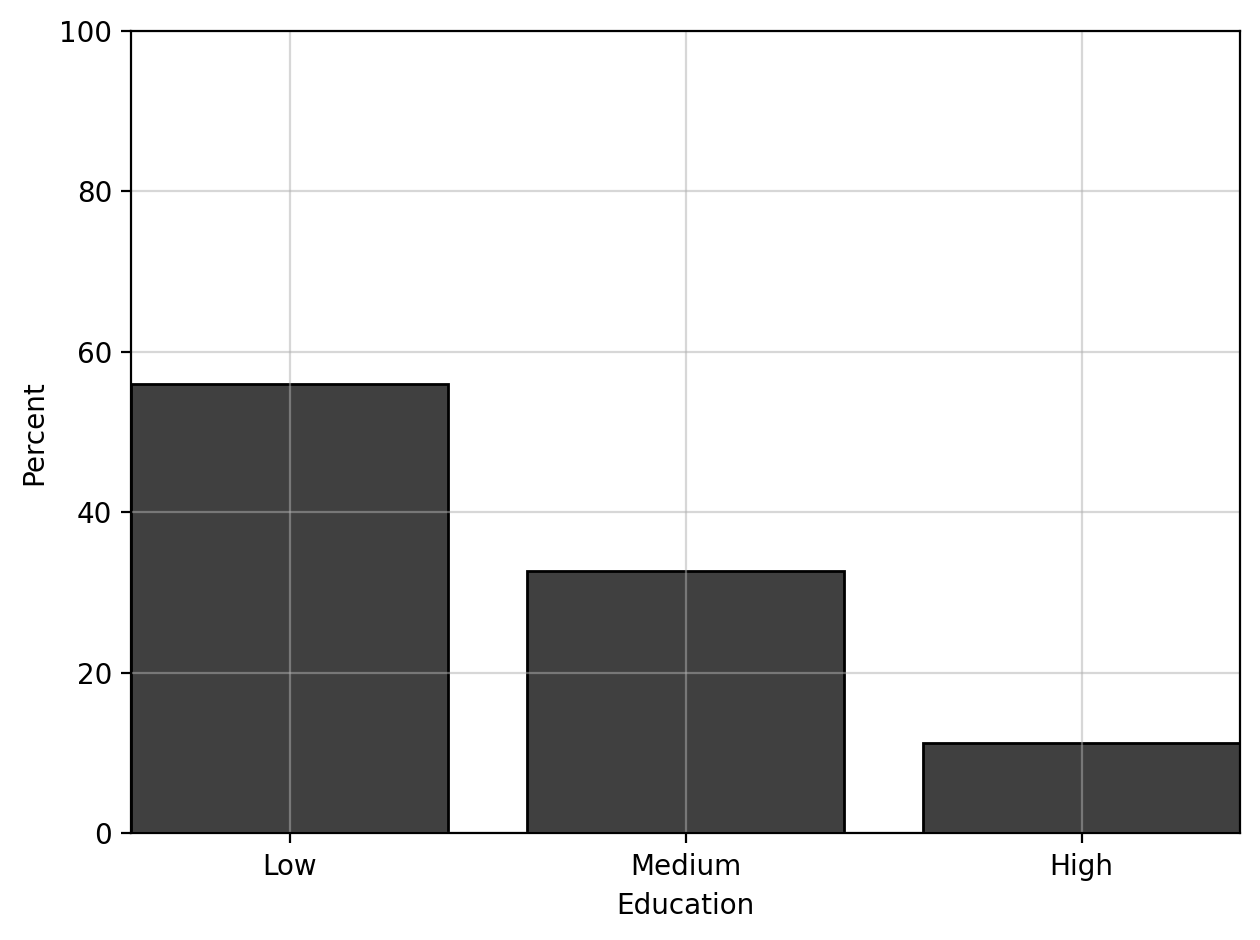

In [242]:
df['education'] = pd.Categorical(df['education'], ['low', 'medium', 'high'])
plt.clf()
ax = sns.histplot(df, x='education',
                  weights='weight_hh',
                  shrink=0.8,
                  stat='percent'
                  )
ax.set_xlabel('Education')
ax.set_xticklabels(['Low', 'Medium', 'High'])

ax.set_ylabel('Percent')
ax.set_ylim(0, 100)

plt.show()

<ipython-input-243-fafe7d775bf4>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Low', 'Medium', 'High'])


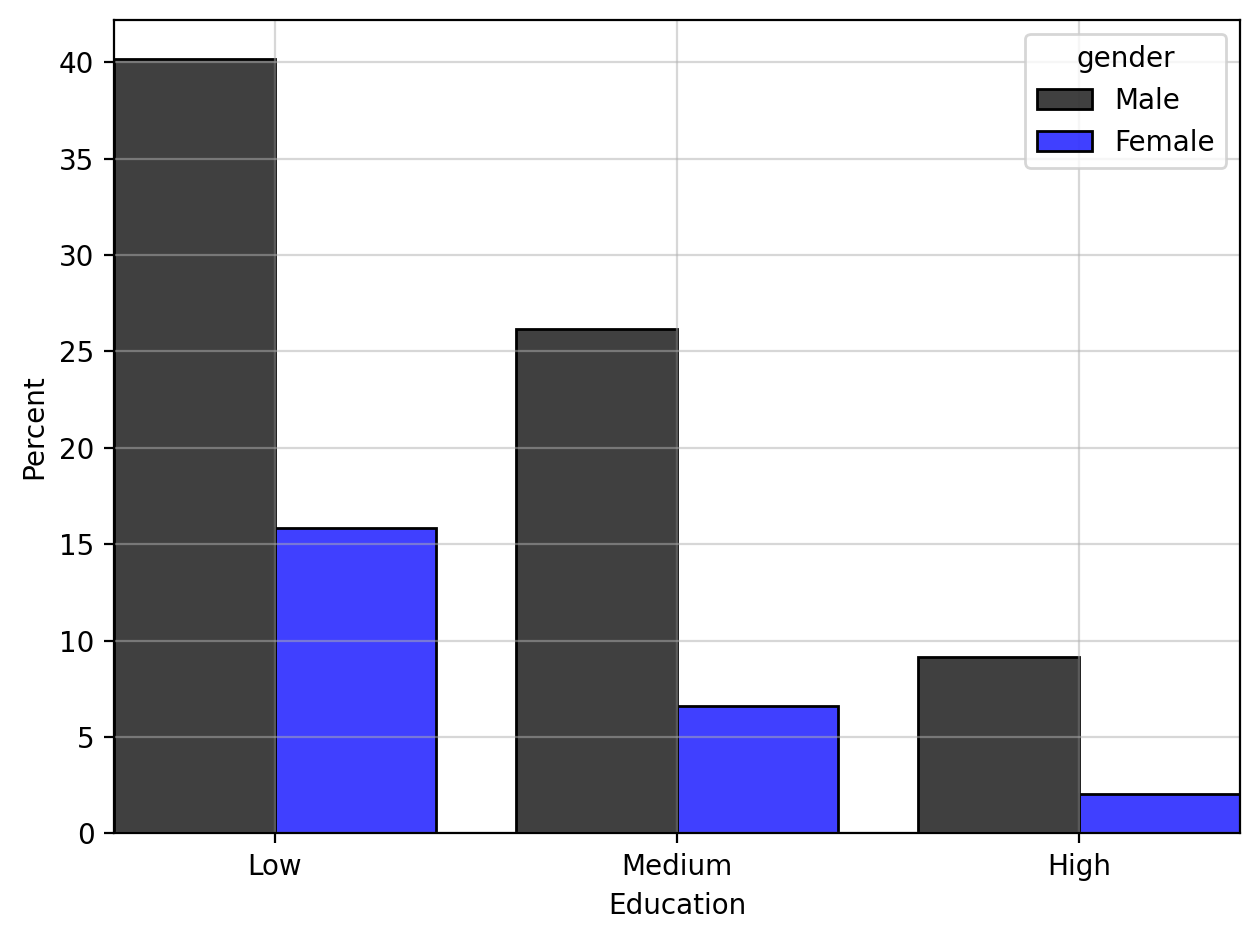

In [243]:
plt.clf()
ax = sns.histplot(df, x='education',
                  weights='weight_hh',
                  shrink=0.8,
                  hue='gender', multiple='dodge', 
                  stat='percent',
                  label = 'Gender'
                  )
plt.xlabel('Education')
plt.ylabel('Percent')
ax.set_xticklabels(['Low', 'Medium', 'High'])
plt.show()

<Figure size 1280x960 with 0 Axes>

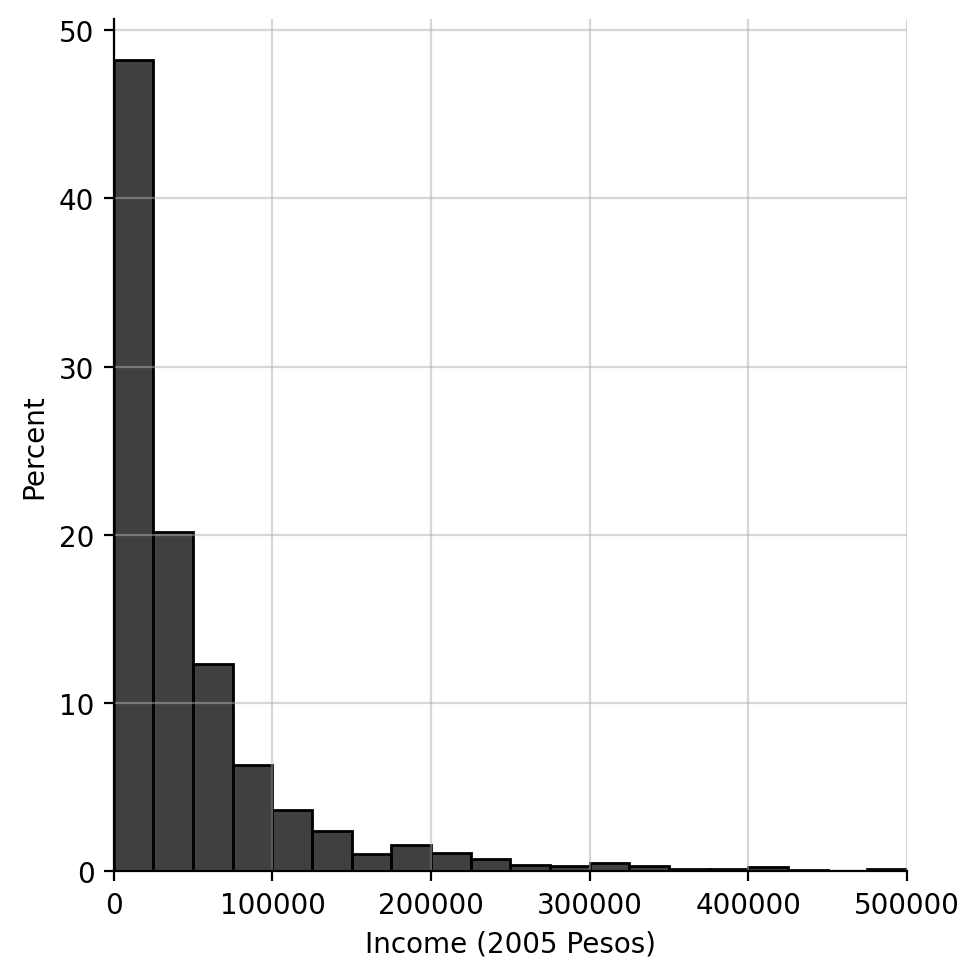

In [244]:
plt.clf()
sns.displot(df,
            x='ind_income',
            weights='weight_ind',
            stat='percent',
            bins=20
            )
plt.xlabel('Income (2005 Pesos)')
plt.show()

<Figure size 1280x960 with 0 Axes>

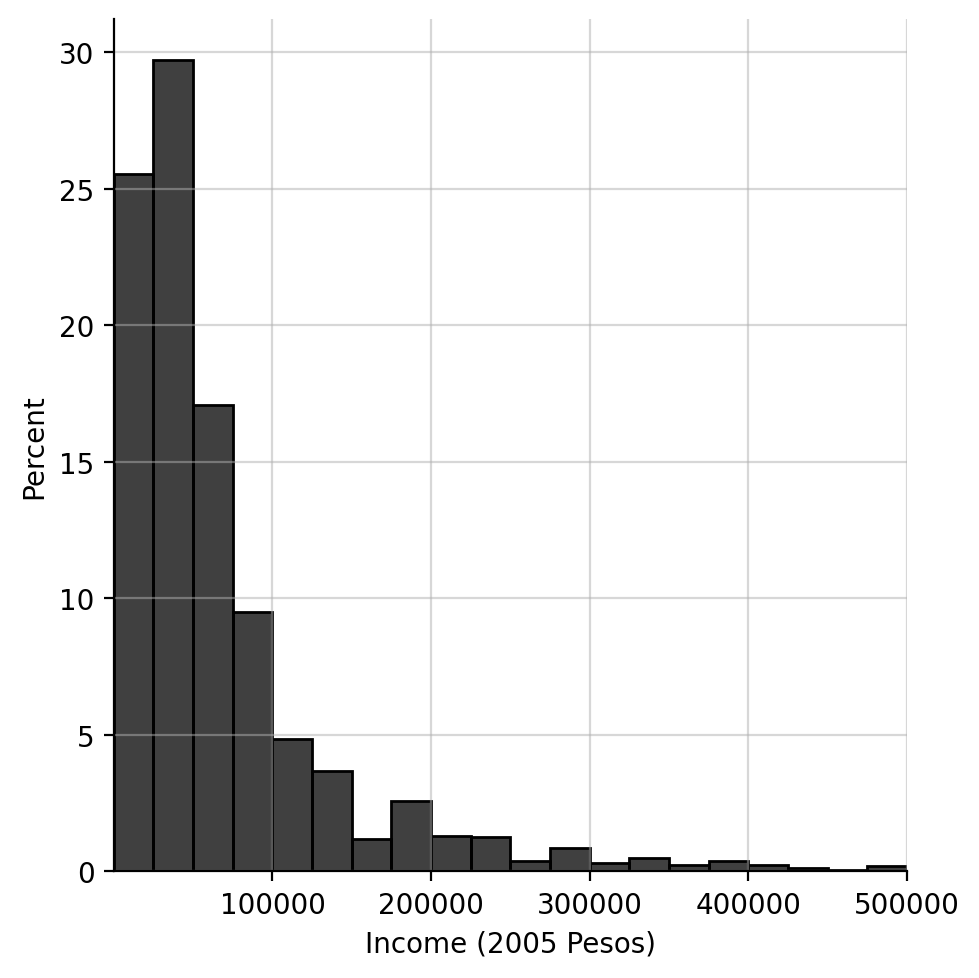

In [245]:
plt.clf()
sns.displot(df.query('ind_income > 0'),
            x='ind_income',
            weights='weight_ind',
            stat='percent', 
            bins=20)
plt.xlabel('Income (2005 Pesos)')
plt.show()

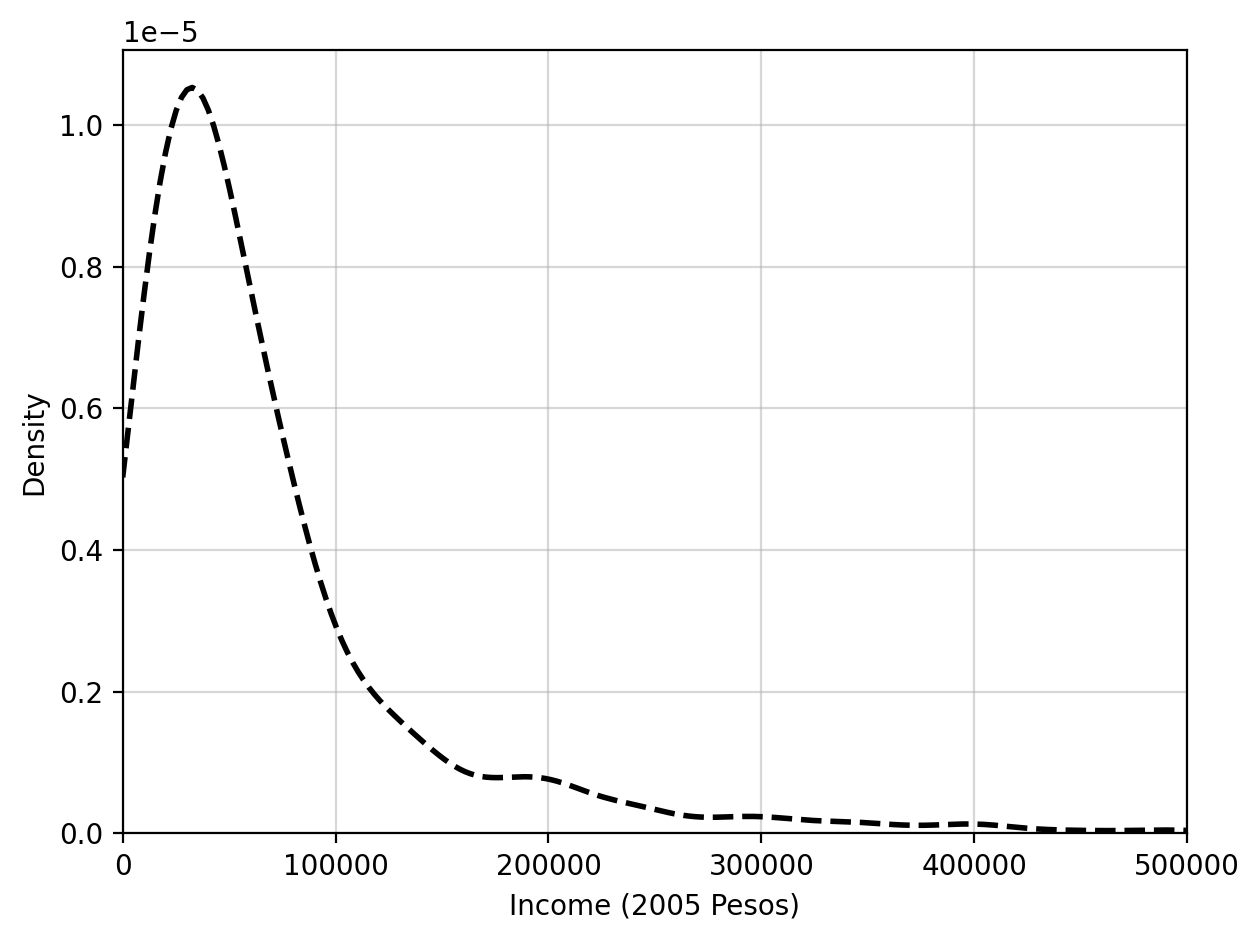

In [257]:
plt.clf()
sns.kdeplot(df.query('ind_income > 0'),
            x='ind_income',
            weights='weight_ind', 
            clip=(0.00, df.ind_income.max()))
plt.xlabel('Income (2005 Pesos)')
plt.show()

In [246]:
hh_savings = [x for x in df.columns if 'hh_has_savings' in x]

def weighted_mean(df, x, weight='weight_hh'):
    return np.sum(df[x] * df[weight]) / np.sum(df[weight])
    
hh_savings_mean = pd.DataFrame(
    index = hh_savings
)
hh_savings_mean['mean'] = [100 * weighted_mean(df, x) for x in hh_savings]
hh_savings_mean.sort_values('mean', ascending=False)

,mean
hh_has_savings,0.146201
hh_has_savings_bank,0.087377
hh_has_savings_credit_institution,0.031762
hh_has_savings_at_house,0.015577
hh_has_savings_other,0.007844
hh_has_savings_cooperative,0.004500
hh_has_savings_afores,0.001598
hh_has_savings_batch,0.001561
hh_has_savings_solidarity,0.000997
hh_has_savings_person_not_hhm,0.000636


In [247]:
ind_savings = [x for x in df.columns if 'ind_has_savings' in x]

def weighted_mean(df, x, weight='weight_ind'):
    return np.sum(df[x] * df[weight]) / np.sum(df[weight])
    

ind_savings_mean = pd.DataFrame(
    index = ind_savings
)
ind_savings_mean['mean'] = [100 * weighted_mean(df, x) for x in ind_savings]
ind_savings_mean.sort_values('mean', ascending=False)

,mean
ind_has_savings,0.993507
ind_has_savings_bank,0.102412
ind_has_savings_savingsbank,0.054051
ind_has_savings_house,0.050009
ind_has_savings_coop,0.012574
ind_has_savings_none,0.009223
ind_has_savings_work,0.007181
ind_has_savings_friend_not_hhm,0.006630
ind_has_savings_afores,0.002049
ind_has_savings_other,0.001967


In [248]:
own = [x for x in df.columns if 'own' in x]

def weighted_mean(df, x, weight='weight_ind'):
    return np.sum(df[x] * df[weight]) / np.sum(df[weight])
    

own_mean = pd.DataFrame(
    index = own
)
own_mean['mean'] = [100 * weighted_mean(df, x) for x in own]
own_mean = own_mean.sort_values('mean', ascending=False)

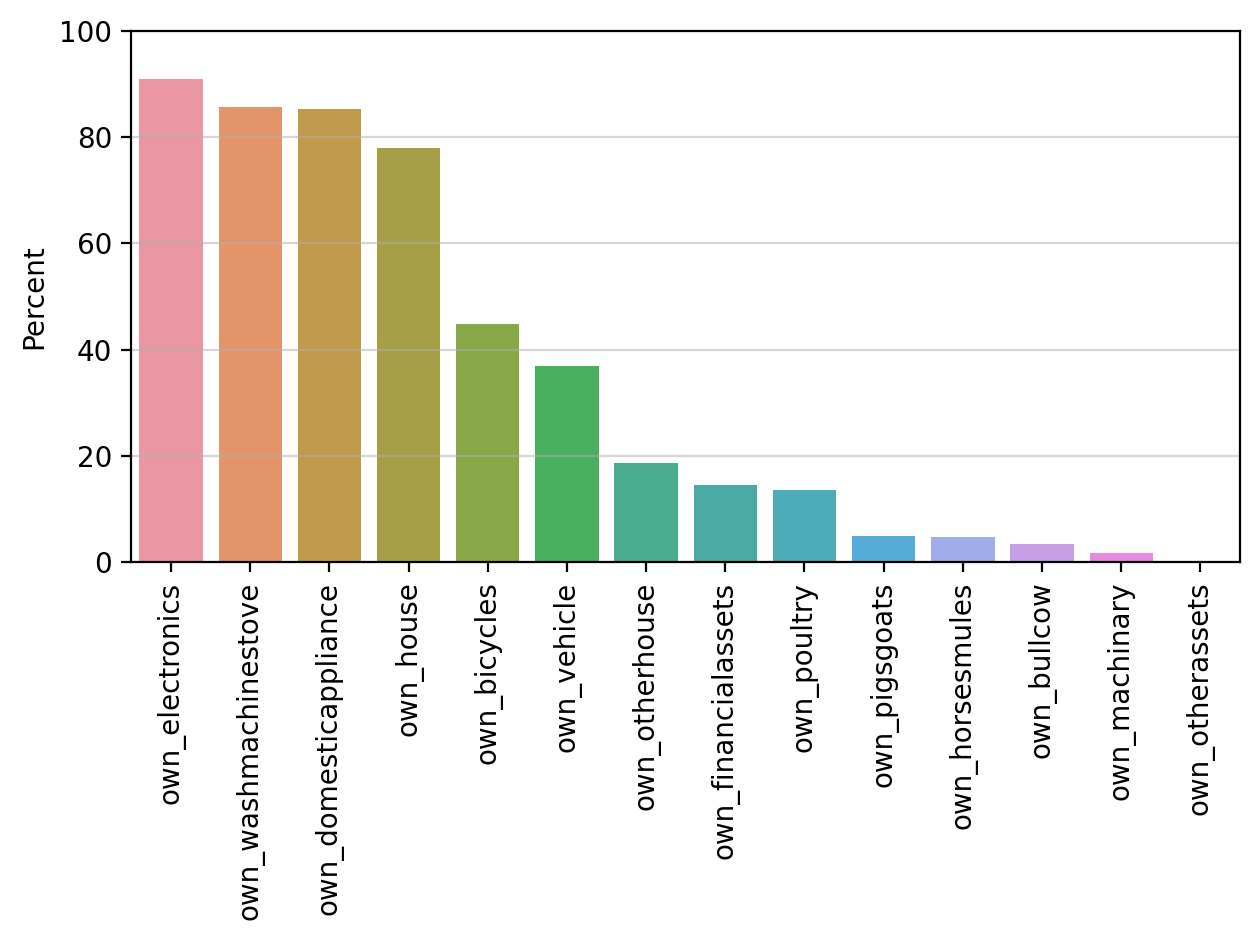

In [249]:
own_mean
plt.clf()
ax = sns.barplot(own_mean, x=own_mean.index, y='mean')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax.set_ylim(0, 100)
ax.set_ylabel('Percent')

plt.show()

/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/seaborn/distributions.py:407: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


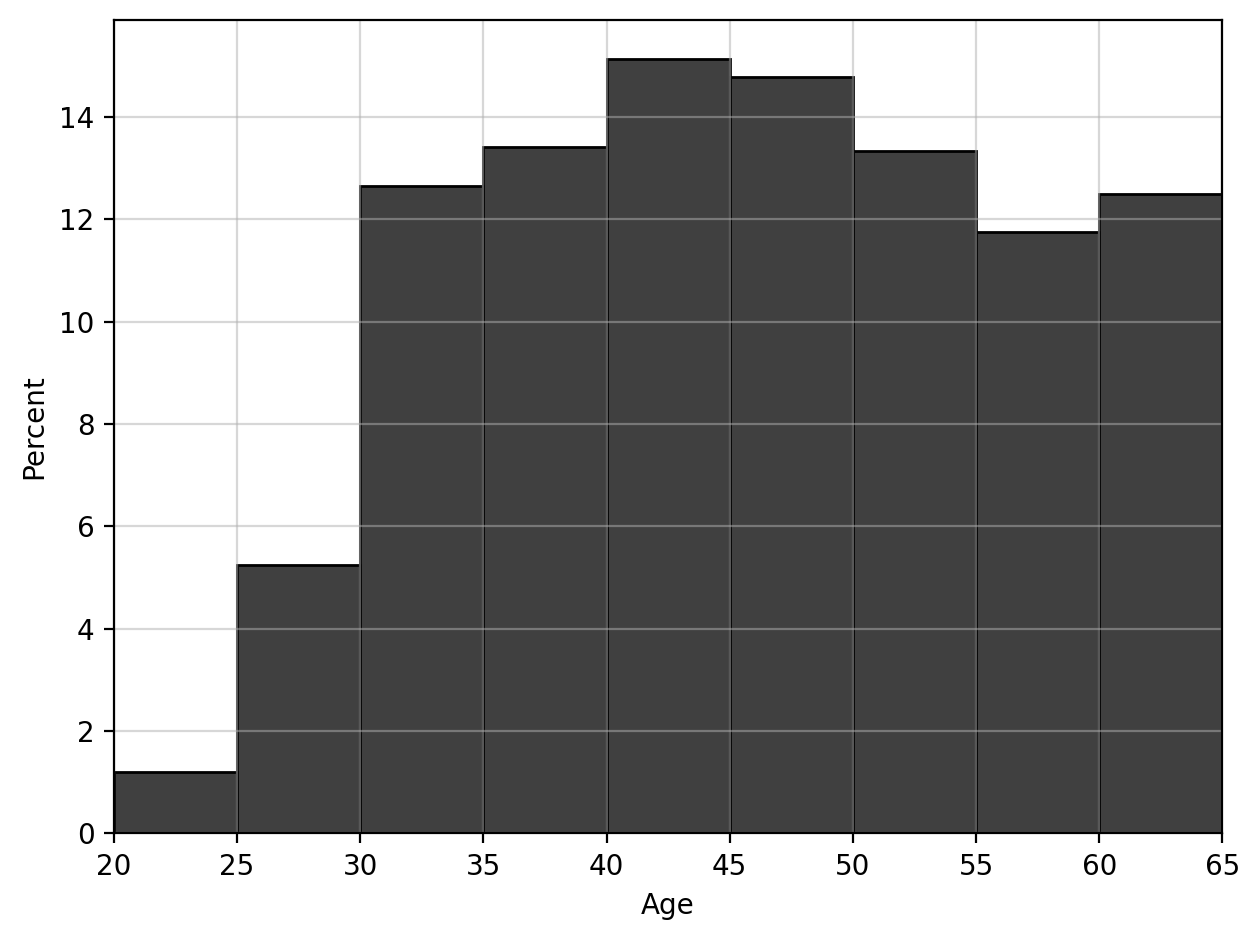

In [250]:
agebins = np.arange(20,70, 5)
plt.clf()
ax = sns.histplot(df, x = 'age', weights='weight_ind', 
             bins=agebins,
             stat='percent')
ax.set_xlabel('Age')
plt.show()

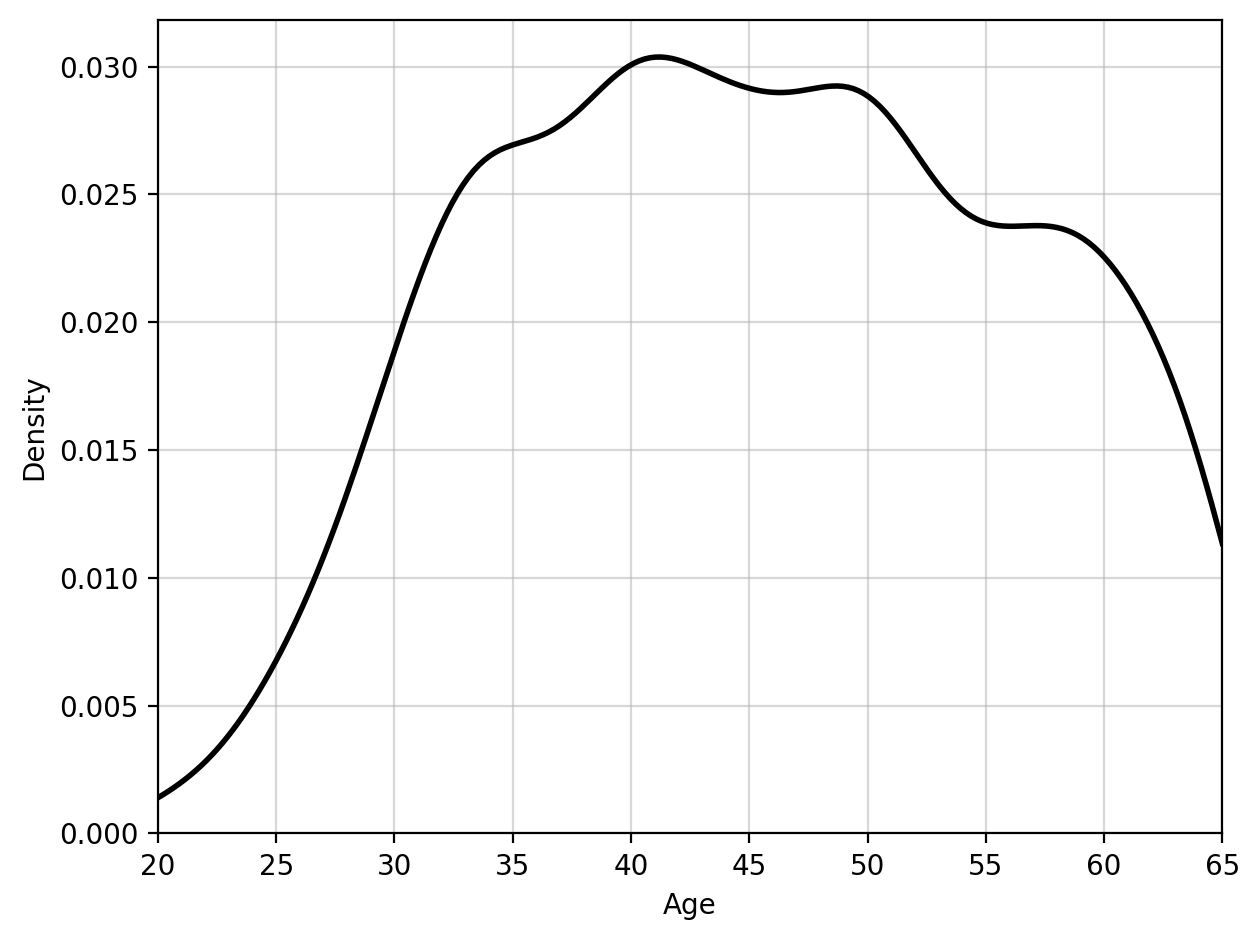

In [261]:
plt.clf()
ax = sns.kdeplot(df, x = 'age', weights='weight_ind',
                 clip = (df.age.min(), df.age.max()),
            linestyle='-')
ax.set_xlim(df.age.min(), df.age.max())
ax.set_xlabel('Age')
plt.show()